In [36]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.python.keras.utils.vis_utils import plot_model

In [37]:
model = Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

In [38]:
mnist = tf.keras.datasets.fashion_mnist

In [39]:
(training_images,training_labels), (test_images,test_labels) = mnist.load_data()

In [40]:
# scaling
training_images = training_images/255

In [41]:
test_images = test_images/255

In [42]:
# model compile
model.compile(optimizer=tf.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [43]:
# training
model.fit(training_images, training_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4997 - accuracy: 0.8242
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3770 - accuracy: 0.8640
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3392 - accuracy: 0.8761
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3165 - accuracy: 0.8823
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2978 - accuracy: 0.8906
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2838 - accuracy: 0.8944
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2703 - accuracy: 0.8993
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2597 - accuracy: 0.9042
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2483 - accuracy: 0.9073
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.240

In [44]:
# evaluation
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3427 - accuracy: 0.8833


[0.3426816463470459, 0.8833000063896179]

With functional API

In [45]:
input_layer = tf.keras.Input(shape=(28,28))
flatten_layer = tf.keras.layers.Flatten()(input_layer)
dense1 = tf.keras.layers.Dense(128, activation=tf.nn.relu)(flatten_layer)
output_layer = tf.keras.layers.Dense(10,activation=tf.nn.softmax)(dense1)
model = Model(inputs = input_layer, outputs = output_layer)

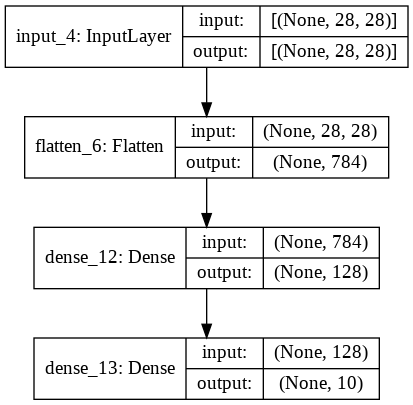

In [46]:
# Plot model graph
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')

In [48]:
# compile and training and evaluate with the functional API
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
model.evaluate(test_images, test_labels)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2800 - accuracy: 0.8964
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2643 - accuracy: 0.9024
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2552 - accuracy: 0.9059
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2462 - accuracy: 0.9071
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2370 - accuracy: 0.9115
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2289 - accuracy: 0.9131
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2215 - accuracy: 0.9166
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2154 - accuracy: 0.9194
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2077 - accuracy: 0.9222
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3461 

[0.34607985615730286, 0.8860999941825867]